In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [26]:
# Creating the dataset with more samples
samples = 200
features, targets = make_classification(n_samples=samples, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=1)

print("Number of Samples : ", samples)

Number of Samples :  200


In [27]:
# Splitting into training and testing sets
train_size = int(0.8 * len(features))
X_train, X_test = features[:train_size], features[train_size:]
y_train, y_test = targets[:train_size], targets[train_size:]

In [28]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,1.232253,-2.474101,0
1,-0.106794,1.214173,1
2,-0.890556,-2.677727,0
3,1.192686,0.561609,1
4,-0.830172,1.158569,1


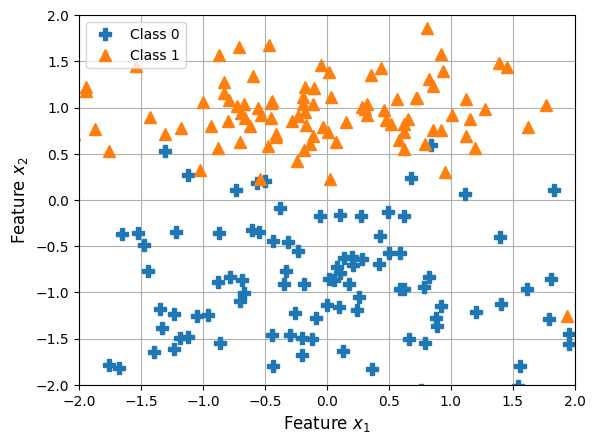

In [29]:
# Visualize the dataset
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker='P',
    markersize=8,
    linestyle='',
    label='Class 0'
)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker='^',
    markersize=8,
    linestyle='',
    label='Class 1'
)

plt.legend(loc=2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

In [30]:
# Create the perceptron
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
        prediction = self.forward(x)
        error = y_true - prediction

        # Updating the weights
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [31]:
# Compute accuracy
def compute_accuracy(model, features, targets):
    correct = sum(int(model.forward(x) == y) for x, y in zip(features, targets))
    return correct / len(targets)

# Train the Model
def train(model, X_train, y_train, epochs):
    for epoch in range(epochs):
        error_count = 0
        train_acc = compute_accuracy(model, X_train, y_train)
        
        error_count = 0
        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)
        print(f"Epoch = {epoch + 1} : Errors = {error_count} : Train Accuracy = {train_acc:.4f}")

# Create a perceptron and train it
epochs = 12
print("Number of Epochs : ", epochs)

ppn = Perceptron(num_features=2)
train(ppn, X_train, y_train, epochs=epochs)

train_acc = compute_accuracy(ppn, X_train, y_train)
test_acc = compute_accuracy(ppn, X_test, y_test)

print("\nTraining Accuracy:", format(train_acc, ".4f"))
print("Test Accuracy:", format(test_acc, ".4f"))

Number of Epochs :  12
Epoch = 1 : Errors = 7 : Train Accuracy = 0.4500
Epoch = 2 : Errors = 7 : Train Accuracy = 0.9750
Epoch = 3 : Errors = 3 : Train Accuracy = 0.9688
Epoch = 4 : Errors = 4 : Train Accuracy = 0.9812
Epoch = 5 : Errors = 4 : Train Accuracy = 0.9812
Epoch = 6 : Errors = 4 : Train Accuracy = 0.9812
Epoch = 7 : Errors = 4 : Train Accuracy = 0.9812
Epoch = 8 : Errors = 5 : Train Accuracy = 0.9750
Epoch = 9 : Errors = 7 : Train Accuracy = 0.9563
Epoch = 10 : Errors = 7 : Train Accuracy = 0.9688
Epoch = 11 : Errors = 6 : Train Accuracy = 0.9750
Epoch = 12 : Errors = 3 : Train Accuracy = 0.9812

Training Accuracy: 0.9812
Test Accuracy: 0.9500


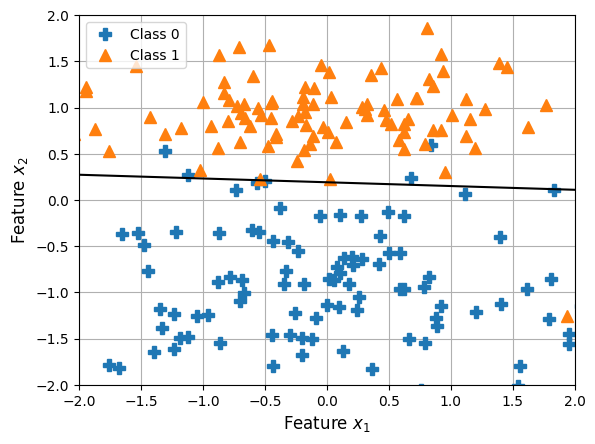

In [32]:
# Plot the Decision Boundary
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="P",
    markersize=8,
    linestyle="",
    label="Class 0",
)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=8,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

#### Conclusion

I used 200 samples (80% for training, 20% for testing) and trained for 12 epochs. The plotted data shows overlapping points between two classes for 200 samples, thus why training and testing accuracy do not reach 1.0.